# 01-Linear Regression: Tutorial

## Jupyter notebook 간단 사용법
- 위에 셀 추가 : 셀 왼쪽 부분 클릭 후, 키보드 'a'키 
- 아래에 셀 추가 : 셀 왼쪽 부분 클릭 후, 키보드 'b'키
- 셀 삭제 : 셀 왼쪽 부분 클릭 후, 키보드 'd'키 두번
- 셀 유형 변경: 코드 모드 (esc + y), 마크 다운 모드 (esc + m)
- 특정 셀 실행 : ctrl + enter
- 주석 처리 : 원하는 코드 드래그 후 , ctrl + /
- 주석 입력 : #주석 기입 or '''주석기입'''
- 쥬피터 노트북 저장 : ctrl + s

## 모듈 불러오기

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

# from sklearn.datasets import load_boston    ##### 윤리적인 문제로 데이터 삭제 #####
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 경고 숨기기
import warnings
warnings.filterwarnings(action='ignore')

# !git clone https://github.com/urbanquixote/DIC.git

In [ ]:
# Data 불러오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data_col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data = pd.DataFrame(data, columns=data_col)

In [ ]:
target = pd.DataFrame(target, columns=['MEDV'])

## 데이터 불러오기: Boston Housing Data

### https://archive.ics.uci.edu/ml/datasets.php

### 데이터 구조  
- 데이터: 1978년 보스턴 주택 가격  
- 관측치 개수: 506개
- 변수 개수: 설명변수 13개 / 반응변수 1개

### 설명 변수(원인: 예측값을 설명할 수 있는 변수)      
- CRIM: 범죄율  
- INDUS: 비소매상업지역 면적 비율  
- NOX: 일산화질소 농도  
- RM: 주택당 방 수  
- LSTAT: 인구 중 하위 계층 비율  
- B: 인구 중 흑인 비율  
- PTRATIO: 학생/교사 비율  
- ZN: 25,000 평방피트를 초과 거주지역 비율  
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
- AGE: 1940년 이전에 건축된 주택의 비율  
- RAD: 방사형 고속도로까지의 거리  
- DIS: 직업센터의 거리  
- TAX: 재산세율  

### 반응 변수(결과: 예측하고자 하는 값)
- MEDV: 주택가격

In [ ]:
# boston = load_boston()

<img src='https://github.com/urbanquixote/DIC/blob/main/Day01/images/linear_image1.PNG?raw=1' width='800'></img>

In [ ]:
# boston 데이터의 독립변수로만 이루어진 데이터프레임의 행과 열 개수 확인
# boston.data.shape

In [ ]:
# boston 데이터의 독립변수로만 이루어진 데이터프레임
# boston.data

In [ ]:
# boston 데이터의 독립변수 이름
# boston.feature_names 

In [ ]:
# boston 데이터의 타겟값(종속변수)
# boston.target[:50]

## 데이터 전처리

$X$: 설명변수/입력변수 <br>
$y$: 반응변수/출력변수

- 데이터 프레임

In [ ]:
# X = pd.DataFrame(boston.data, columns=boston.feature_names)
# y = pd.DataFrame(boston.target, columns=['MEDV'])

X = data
y = target

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


- 데이터 병합

In [ ]:
data = pd.concat([X, y], axis=1) # X와 Y 변수 병합

In [ ]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## 탐색적 데이터 분석

.describe()를 이용하여 데이터 변수별 기초 통계량 값 확인 가능

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


sns.pairplot을 이용하여 설명변수의 분포(히스토그램) 및 설명변수들 간의 관계(산점도)를 그리고, 특성을 파악

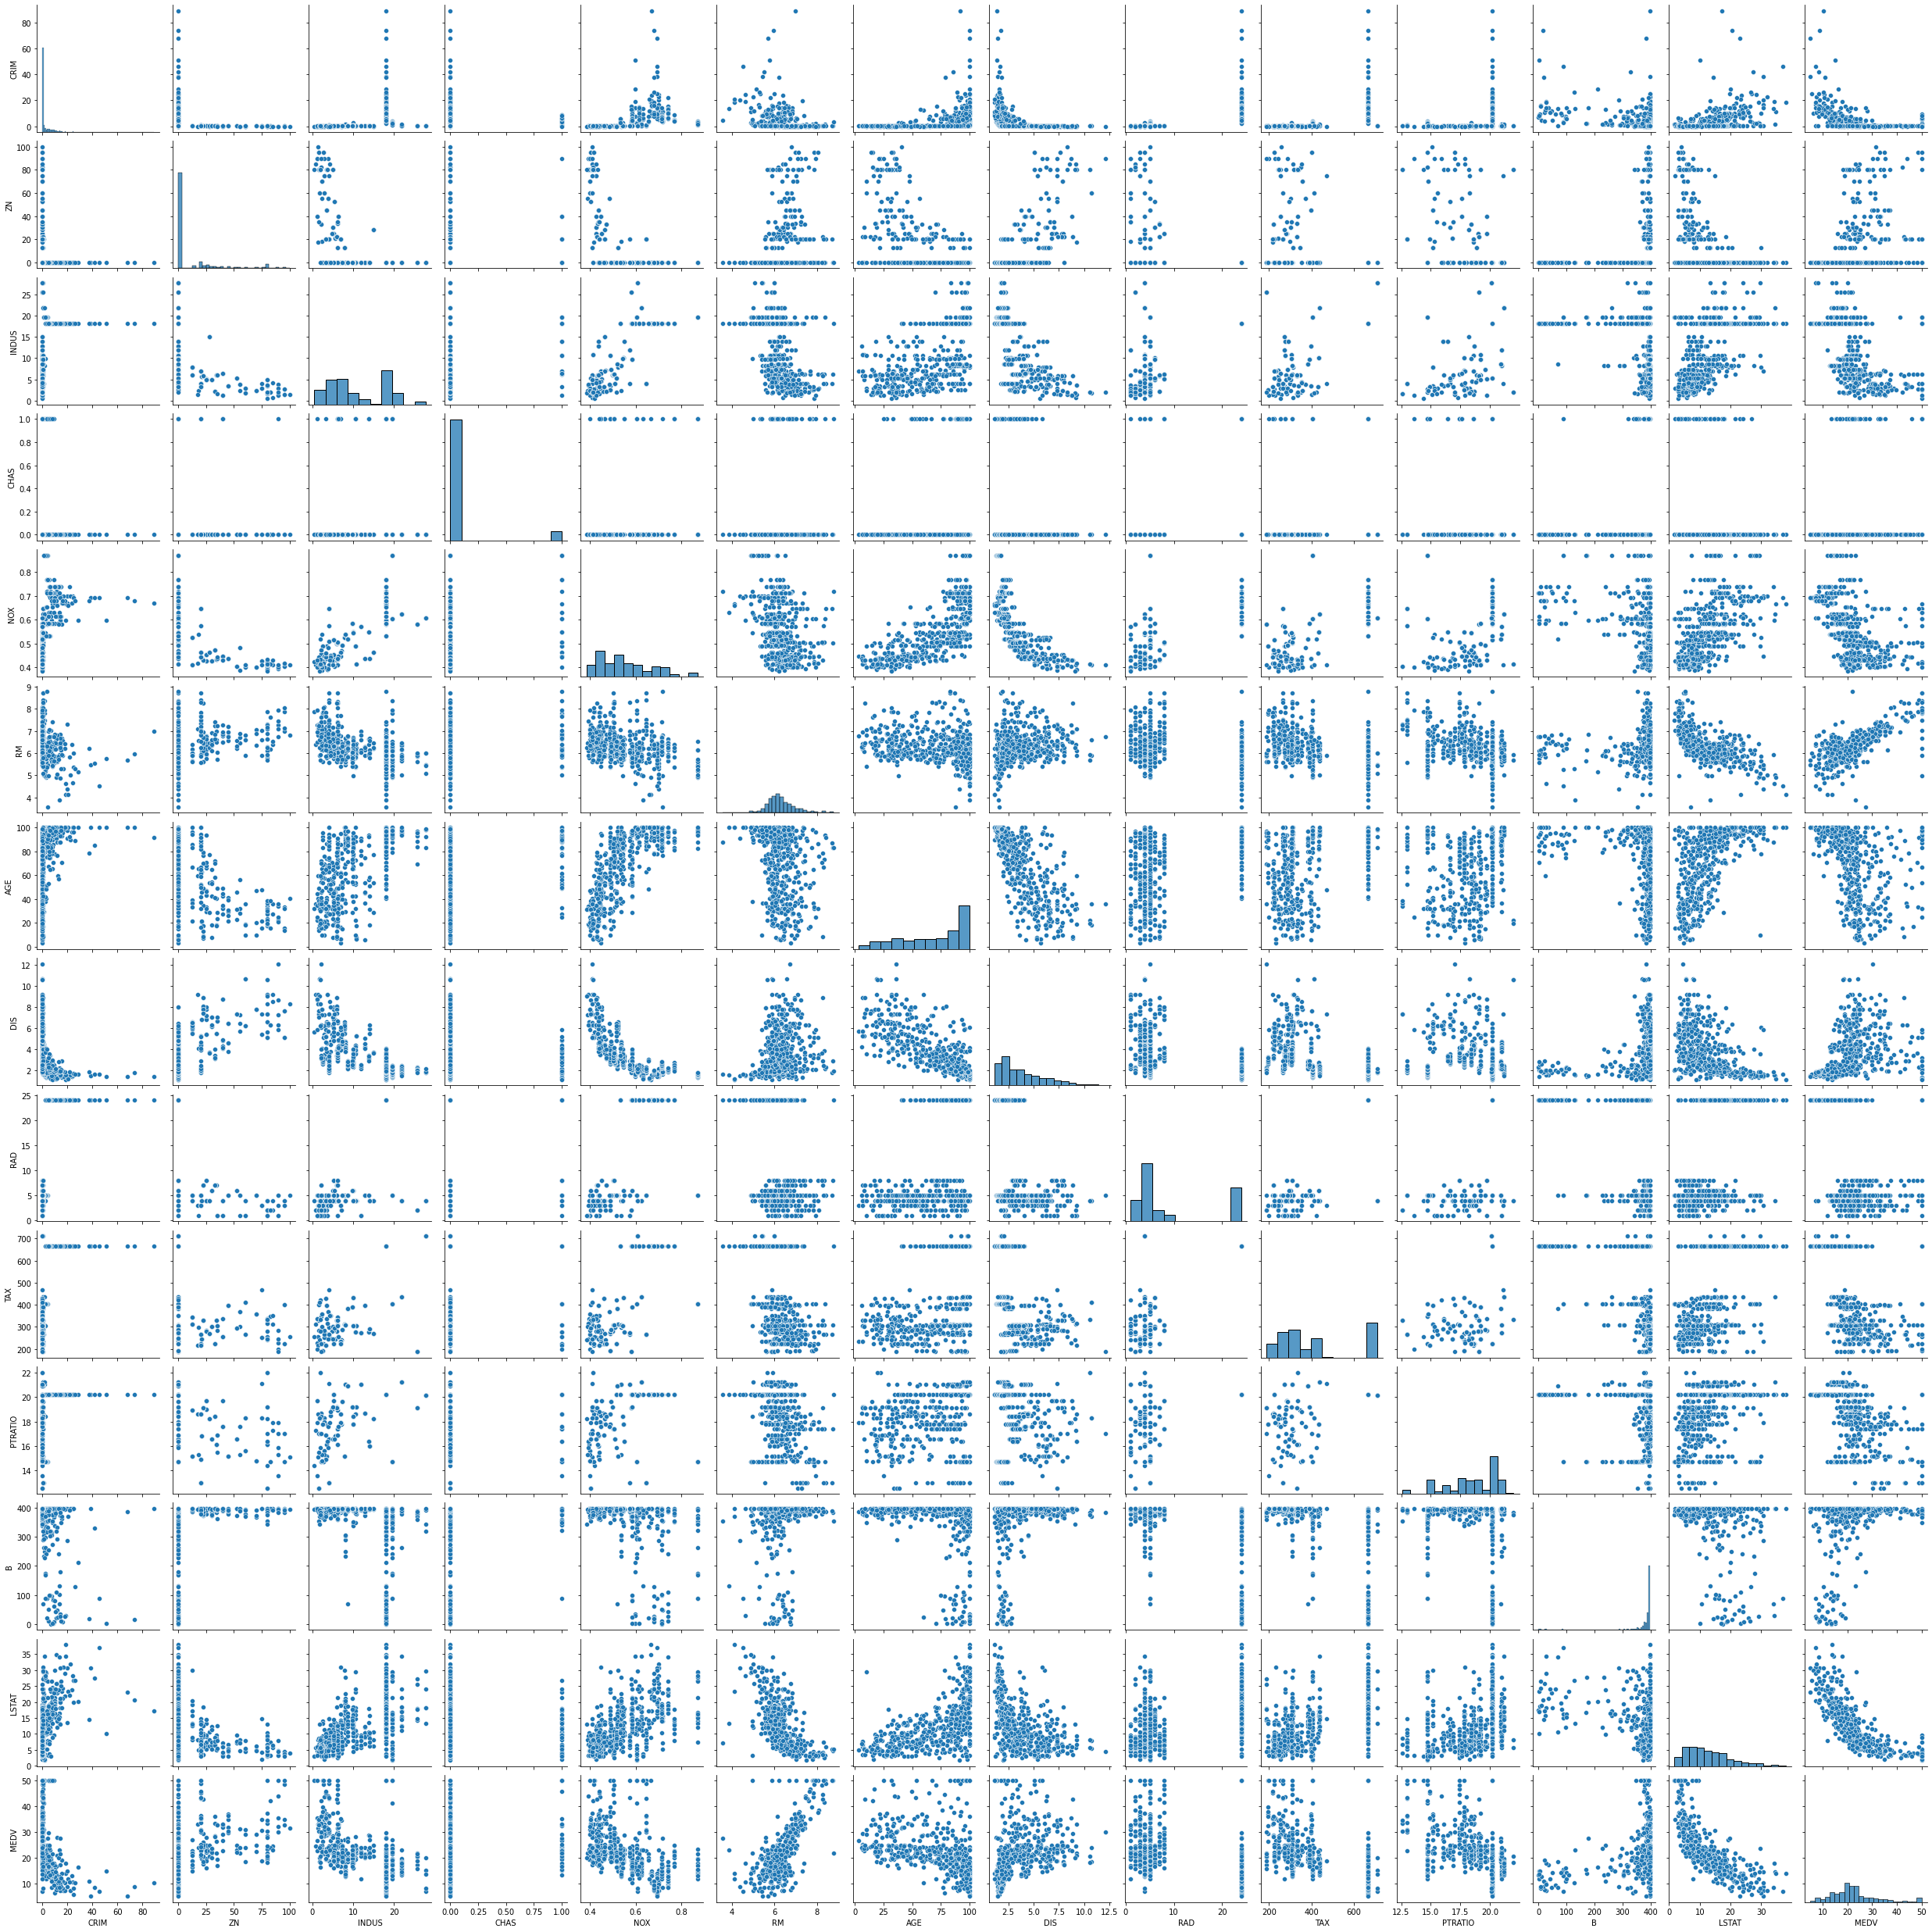

In [ ]:
sns.pairplot(data)
plt.show()

### 일부 변수만 선택하여 확인

<Figure size 720x720 with 0 Axes>

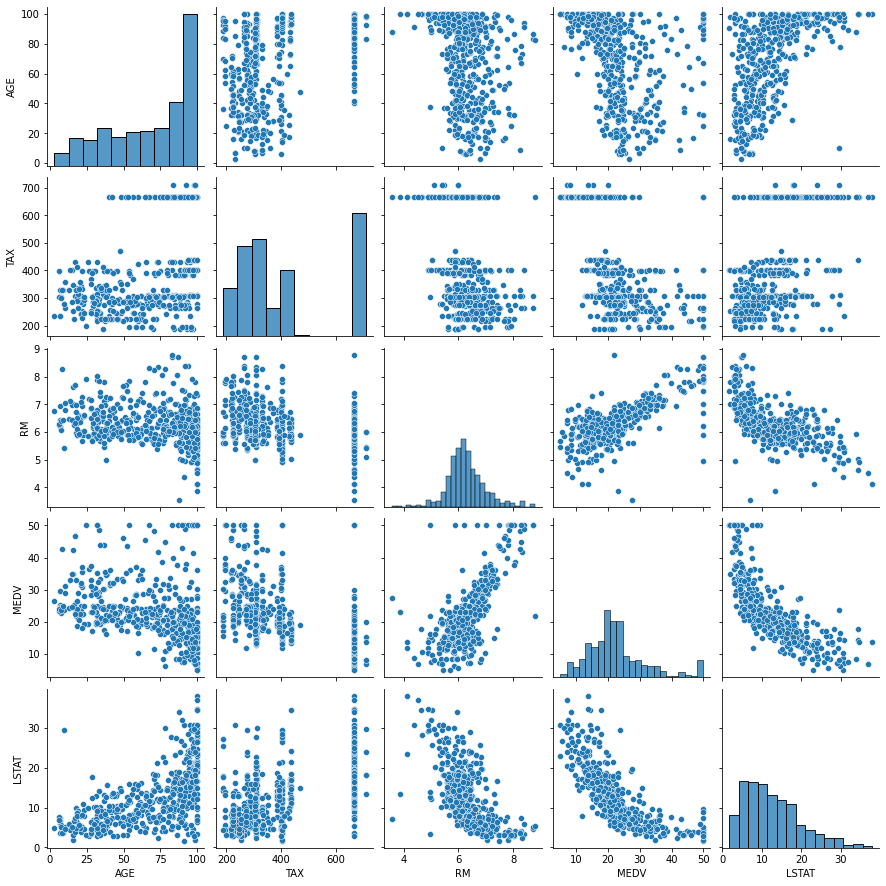

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(data[['AGE', 'TAX', 'RM', 'MEDV', 'LSTAT']])
plt.show()

### 설명변수 간 상관계수(correlation) 확인

- data.corr(): 데이터 상관관계
- sns.heatmap(데이터, cmap= colormap 이름, annot=히트맵 안에 표시할 데이터)


In [ ]:
X.corr()  # 13X13 matirx

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


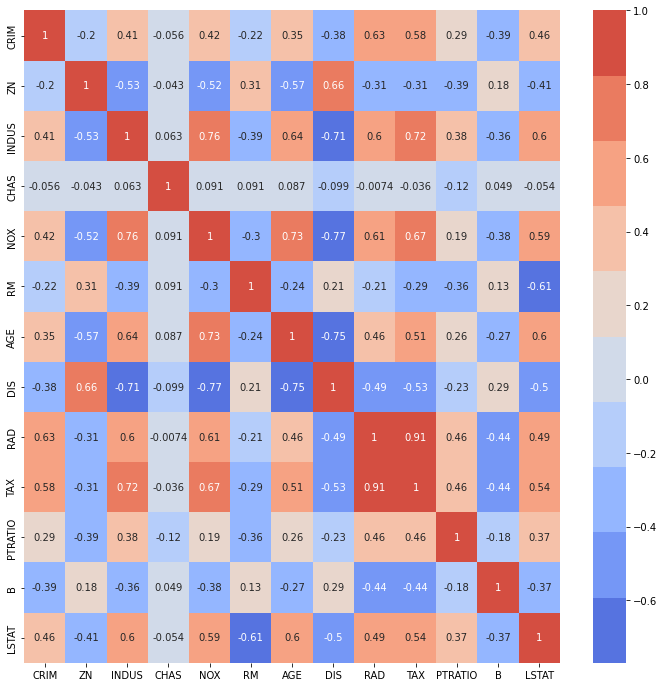

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(X.corr(), cmap=sns.color_palette("coolwarm", 10), annot=X.corr())
plt.show()

## 모델링

### statsmodels의 OLS를 사용하여 선형회귀분석 시행 (OLS: Ordinary Least Squares)
 - OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β1, β2 ...) 구하는 방법
 - 모델 선언: model = sm.OLS(Y데이터, X데이터)   
 - 모델 학습: model_trained = model.fit()

In [ ]:
added_constant_X=sm.add_constant(data.drop(['MEDV'], axis=1))
added_constant_X.head(5)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
model_sm = sm.OLS(data['MEDV'], added_constant_X)

In [ ]:
model_trained_sm = model_sm.fit()

### statsmodels의 OLS 모델 해석
- R-squared (결정계수,coefficient of determination):모형의 성능
- coef (회귀계수): X가 한단위 증가할 때 Y의 변화량
- P>[t] (p-value):0.05(유의수준) 이하일 때 변수가 유의미

In [ ]:
display(model_trained_sm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          6.72e-135
Time:                        10:53:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<img src='https://github.com/urbanquixote/DIC/blob/main/Day01/images/linear_image3.PNG?raw=1' width='800'></img>

- p-value: 귀무가설(H0)이 참일 확률
- p-value 작다 -> 기울기 0 아님
- p-value 크다 -> 기울기 0

#### 확률오차의 정규성 확인

<img src='https://github.com/urbanquixote/DIC/blob/main/Day01/images/linear_image4.PNG?raw=1' width='800'></img>

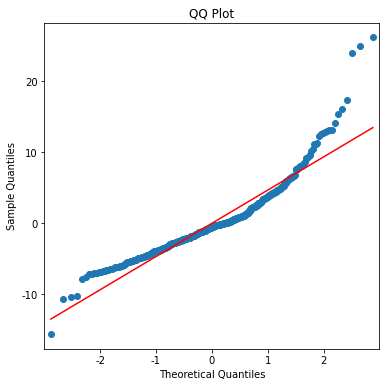

In [ ]:
model_residuals = model_trained_sm.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(6)
sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

#### 확률오차의 등분산성 확인

In [ ]:
model_fitted_y= model_trained_sm.fittedvalues

In [ ]:
model_fitted_y

0      30.003843
1      25.025562
2      30.567597
3      28.607036
4      27.943524
         ...    
501    23.533341
502    22.375719
503    27.627426
504    26.127967
505    22.344212
Length: 506, dtype: float64

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

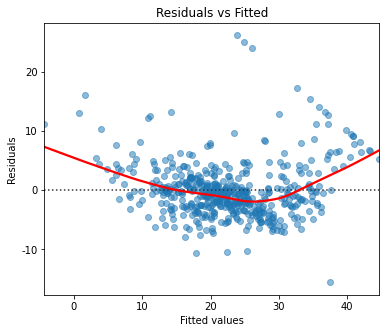

In [ ]:
model_fitted_y= model_trained_sm.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(6)

# sns.residplot(model_fitted_y, data['MEDV'], data=added_constant_X, lowess=True, scatter_kws={'alpha': 0.5}, 
#               line_kws={'color':'red'}, ax=ax)
sns.residplot(x=model_fitted_y, y=data['MEDV'], lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

### sklearn의 LinearRegression 모듈을 사용하여 선형회귀분석 시행
 - 모델 선언: model = LinearRegression()   
 - 모델 학습: model.fit(X,y)
 - 모델 파라미터(상수항 미포함): model.coef_
 - 모델 상수항: model.intercept_

<img src='https://github.com/urbanquixote/DIC/blob/main/Day01/images/linear_image5.PNG?raw=1' width='800'></img>

In [ ]:
model_sklearn = LinearRegression()
model_sklearn.fit(X=data.drop(["MEDV"],axis=1),y=data['MEDV'])

LinearRegression()

In [ ]:
model_sklearn.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [ ]:
model_sklearn.intercept_

36.459488385089955

## 실제값 vs. 모델 출력 값 비교
 - predicted_values = trained_model.predict(new_data)

### 실제값 - 모델 출력 값 산점도를 통한 비교

In [ ]:
y_predicted_sklearn = model_sklearn.predict(data.drop(["MEDV"],axis=1))

In [ ]:
y_predicted_sm = model_trained_sm.fittedvalues
y_predicted_sm.head()

0    30.003843
1    25.025562
2    30.567597
3    28.607036
4    27.943524
dtype: float64

In [ ]:
y_predicted_sm = model_trained_sm.predict(added_constant_X)
y_predicted_sm.head()

0    30.003843
1    25.025562
2    30.567597
3    28.607036
4    27.943524
dtype: float64

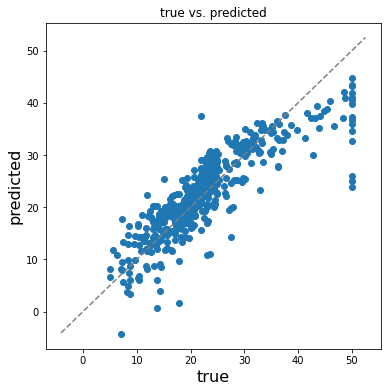

In [ ]:
fig_values = np.concatenate([y.values.squeeze(), y_predicted_sm.values.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(6, 6))
plt.title('true vs. predicted')
plt.scatter(y, y_predicted_sm)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('true', size=16)
plt.ylabel('predicted', size=16)
plt.show()

### 모델 출력 값 평가를 위한 지표들

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

###  Mean Squared Error (평균 제곱 오차): <br>
$\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$   

In [ ]:
print(mean_squared_error(y.values.squeeze(), y_predicted_sm.values.squeeze()))

21.894831181729206


###  Root Mean Squared Error (평균 제곱근 오차): <br>
$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$

In [ ]:
print(np.sqrt(mean_squared_error(y.values.squeeze(),y_predicted_sm.values.squeeze())))

4.679191295697282


### Mean Absolute Error (평균 절대 오차): <br>
$\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$



In [ ]:
print(mean_absolute_error(y.values.squeeze(), y_predicted_sm.values.squeeze()))

3.2708628109003115


###  Mean Absolute Percentage Error (평균 절대 백분율 오차): <br>
$\frac{1}{n}\sum_{i=1}^{n} \left|\frac{y_{i} - \hat{y}_{i}}{y_{i}} \right| \times 100\%$

In [ ]:
print(mean_absolute_percentage_error(y.values.squeeze(), y_predicted_sm.values.squeeze()))

16.41729880648993


###  Correlation Coefficient (상관계수)

In [ ]:
print(np.corrcoef(data['MEDV'].values.flatten(), y_predicted_sm.values.squeeze()))

[[1.         0.86060599]
 [0.86060599 1.        ]]


In [ ]:
print(r2_score(y, y_predicted_sm)) # 결정 계수

0.7406426641094094


<img src='https://github.com/urbanquixote/DIC/blob/main/Day01/images/linear_image6.PNG?raw=1' width='600'></img>

### testing data 기준 예측 성능 평가

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.2, random_state=0)
print(data.shape)
print(train.shape)
print(test.shape)

(506, 14)
(404, 14)
(102, 14)


In [ ]:
model = LinearRegression()
model.fit(X=train.drop(["MEDV"],axis=1), y=train['MEDV'])

LinearRegression()

In [ ]:
testing_predicted_values = model.predict(test.drop(["MEDV"],axis=1))
testing_real_values = test["MEDV"].values

training_predicted_values = model.predict(train.drop(["MEDV"],axis=1))
training_real_values = train["MEDV"].values

### 결과 정리

In [ ]:
print('Training MSE: {:.3f}'.format(mean_squared_error(training_real_values, training_predicted_values)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(training_real_values,training_predicted_values))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(training_real_values, training_predicted_values)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(training_real_values, training_predicted_values)))
print('Training R2: {:.3f}'.format(r2_score(training_real_values, training_predicted_values)))

Training MSE: 19.326
Training RMSE: 4.396
Training MAE: 3.103
Training MAPE: 15.373
Training R2: 0.773


In [ ]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(testing_real_values, testing_predicted_values)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(testing_real_values,testing_predicted_values))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(testing_real_values, testing_predicted_values)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(testing_real_values, testing_predicted_values)))
print('Testing R2: {:.3f}'.format(r2_score(testing_real_values, testing_predicted_values)))

Testing MSE: 33.449
Testing RMSE: 5.784
Testing MAE: 3.843
Testing MAPE: 18.356
Testing R2: 0.589


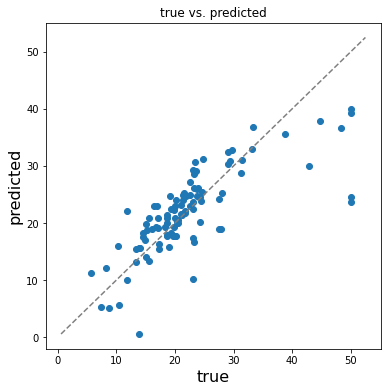

In [ ]:
fig_values = np.concatenate([testing_real_values.squeeze(), testing_predicted_values.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(6, 6))
plt.title('true vs. predicted')
plt.scatter(testing_real_values.squeeze(), testing_predicted_values.squeeze())
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('true', size=16)
plt.ylabel('predicted', size=16)
plt.show()

# EOD